In [1]:
import plotly, logging, pandas
import plotly.express as px
logger = logging.getLogger()
# Setting the threshold of logger to DEBUG
#logger.setLevel(logging.INFO)
logger.setLevel(logging.DEBUG)

import plotly.graph_objects as go

from plotly.graph_objects import Layout
plotly.__version__


'5.22.0'

In [2]:
# helper functions
def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    # fix indentation 
    #positions = ['top right', 'bottom right']  # you can add more: left center ...
    positions = ['top right','middle right','bottom right']  # you can add more: left center ...
    positions = ['bottom center']  # you can add more: left center ...
    positions = ['middle right']  # you can add more: left center ...
    positions = ['top center']  # you can add more: left center ...

    positions = ['middle right',
                 'middle right',
                 'middle right',
                'middle right',
                 'middle left',
                ]  # you can add more: left center ...

    positions = ['bottom center']  # you can add more: left center ...
    
    return [positions[i % len(positions)] for i in range(len(x))]

def show_scatters(data,No_text=False):
    if(No_text==True):
        text=None
    else:
        text="Method"
    fig = px.scatter(data, x="Test_cost", y="Test_acc", text=text, color="Provider",
                     size_max=60,width=600, height=500,
                    symbol_sequence= ['circle', 'square', 'diamond','star','bowtie'],
                     symbol="Marker",
                     color_discrete_sequence = px.colors.qualitative.T10,
)

    fig.update_traces(textposition=improve_text_position(data['Test_cost']))

    fig.update_layout(
        margin=dict(l=0,r=0,b=0,t=0),
        xaxis_title="Cost",
    yaxis_title="Accuracy",
        font=dict(
        family="Arial Black",
        size=18,

#        color="RebeccaPurple"
    )
#        font_family="Times New Roman"

    )
    
    fig.update_traces(marker=dict(size=10,
                              ),
                     )
                      
    return fig

def add_lines(fig,data,name="FrugalGPT",marker_color="orange",line_color="red"):        
    fig.add_trace(
        go.Scatter(
            name=name,
            x=data["Test_budget"],
            y=data['Test_acc'],
        mode="lines+markers",
             marker=dict(size=15
                         ,color=marker_color),
            
        line=go.scatter.Line(color=line_color,width=5),
        showlegend=True),
        
)
    return fig
   

def add_scatters(fig,data,name="Test"):
    trace2= px.scatter(x=data["Test_cost"],
            y=data['Test_acc'],
            text=data["Method"],
            title="first trace",
            marker=dict(color='red'),           
                      )

    fig.add_trace(trace2.data[0])
    return fig

def show_legend(fig,names=[]):
    labels_to_show_in_legend = names

    for trace in fig['data']: 
        logging.debug("trace is {}".format(trace))
        if (not trace['name'] in labels_to_show_in_legend):
            trace['showlegend'] = False
        
    fig.update_layout(legend=dict(
    yanchor="top",
    y=0.15,
    xanchor="center",
    x=0.7
),
    legend_title="",
                     )
    fig.update_layout(legend_traceorder="reversed")
    return fig

def update_format(fig,xrange=None,yrange=None):
    layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

    
    fig.update_layout(
        margin=dict(l=0,r=0,b=0,t=0),
        xaxis_title="Cost ($)",
    yaxis_title="Accuracy",
        font=dict(
        family="Arial",
        size=25,
        #color='rgba(0,0,0,0)',

#        color="RebeccaPurple"
    )
#        font_family="Times New Roman"

    )
    fig.update_layout(plot_bgcolor = "white")
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')
    fig.update_traces(marker={'size': 15,'opacity':0.7,})
    #fig.update_layout(xaxis_type = "log")
    if(xrange!=None):
        fig.update_xaxes(range=xrange)
    if(yrange!=None):
        fig.update_yaxes(range=yrange)
    return fig

def data_format(datapath="../../summary/headlines_perf_seed_9.csv",
                datapath_FT="../../summary/headlines_perf_seed_9_FT.csv", 
               ):
    d1 = pandas.read_csv(datapath)
    d1['Group'] = 'Plain'
    d2 = pandas.read_csv(datapath_FT)
    d2['Group'] = 'FT'
    frames = [d1, d2]

    result = pandas.concat(frames)
    return result

In [3]:
def show_tradeoffs(datapath="../../summary/headlines_perf_seed_9.csv",
                   datapath_FT="../../summary/headlines_perf_seed_9_FT.csv",                   
                   savepath="../../figures/tradeoffs/OVERRULING.pdf",
                   our_method = "FrugalGPT",
                   SingleLLM = ["CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","CoHere-M","J1","J1-G","FT-GPT-C"],
                   FT_LLM=["FT-GPT-C"],
                   LLM_Name_MAP=None,
                   legend=False,
                   yrange=None,
                   xrange=None,
                   No_text=False,
                   width=600,
                   height=600,
                  ):
    # extract data
    data = data_format(datapath=datapath,datapath_FT=datapath_FT) 
    data['Test_budget'] = data['Budget']*data["Test_size"]
    logging.debug("data is {}".format(data))
    
    # show base method
    LLMs = data.loc[data['Method'].isin(SingleLLM)]
    if(LLM_Name_MAP!=None):
        LLMs = LLMs.replace(LLM_Name_MAP)
    #LLMs = LLMs.loc[LLMs['Group']=='FT']
    logging.debug("base API is {}".format(LLMs))
    fig = show_scatters(LLMs,No_text=No_text)



    # show FrugalGPT
    FrugalGPT = data.loc[data['Method']==our_method]
    FrugalGPT_Plain = FrugalGPT.loc[FrugalGPT['Group']=="Plain"]
    FrugalGPT_FT = FrugalGPT.loc[FrugalGPT['Group']=="FT"]
    fig = add_lines(fig,FrugalGPT_Plain,name="FrugalGPT",marker_color="red",line_color="red")
    #fig = add_lines(fig,FrugalGPT_FT,name="FrugalGPT",marker_color="red",line_color="red")
     
    if(legend):    
        fig=show_legend(fig,names=['FrugalGPT'])
    else:  
        fig=show_legend(fig,names=[])
        
    fig = update_format(fig,yrange=yrange,xrange=xrange)
    fig.update_layout(legend=dict(x=0.5,y=1.1),
                     width=width,
                     height=height)

    fig.show()
    fig.write_image(savepath)
    return fig


DEBUG:root:data is     Test_acc  Test_cost  Test_size  Train_acc  Train_cost  Train_size  \
0      0.100   1.948636       5000     0.8182    1.946876        5000   
1      0.100   0.804475       5000     0.7248    0.804312        5000   
2      0.100   0.277354       5000     0.7786    0.276954        5000   
3      0.100   2.500000       5000     0.8176   27.501500        5000   
4      0.100   4.800160       5000     0.7804    4.800000        5000   
..       ...        ...        ...        ...         ...         ...   
37     0.878   0.000365       5000     0.8908    0.000372        5000   
38     0.878   0.000365       5000     0.8908    0.000372        5000   
39     0.878   0.000365       5000     0.8908    0.000372        5000   
40     0.878   0.000365       5000     0.8908    0.000372        5000   
41     0.878   0.000365       5000     0.8908    0.000372        5000   

       Budget     Method   Provider  Marker  Group  Test_budget  
0   10.000000    GPT-Neo  Textsynth   

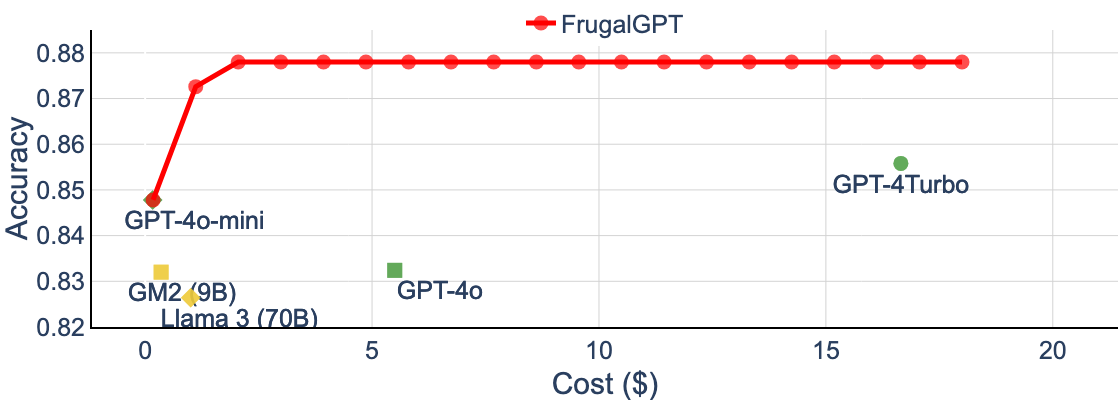

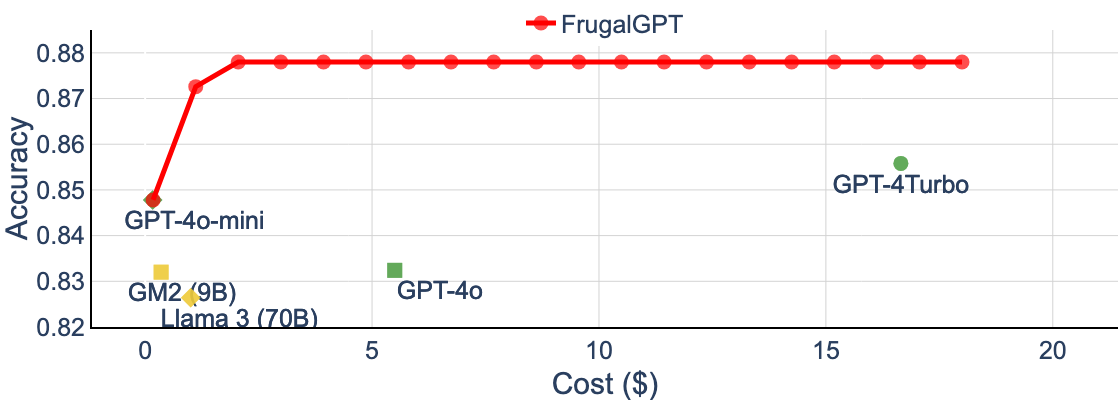

In [5]:
show_tradeoffs(SingleLLM = ['Meta-Llama-3-70B-Instruct-Turbo',
    "gpt-4o-mini","gpt-4o","gpt-4-turbo","gemma-2-9b-it","CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","J1","J1-G","J1-L","FA-Q"],
              savepath="../../figures/HEADLINES_2024updatemodel.pdf",
               datapath="../../summary/headlines_e8_perf_seed_9_2024updatedmodel.csv",
            datapath_FT='../../summary/headlines_e8_perf_seed_9_2024updatedmodel.csv',
               legend=True,
              LLM_Name_MAP={
                  "Meta-Llama-3-70B-Instruct-Turbo":"              Llama 3 (70B)",
                  "gemma-2-9b-it":"      GM2 (9B)",
                  "gpt-4o":"             GPT-4o", 
                  "gpt-4o-mini":"            GPT-4o-mini",
                  "gpt-4-turbo":"GPT-4Turbo",
                  "GPT-FSQ":"FSQ","GPT-C":"GPT-C","CoHere":" CoHere","CoHere-M":"C-M","FA-Q":"FQ","FA-C":"FC","FT-C":"FT","CHATGPT":"ChatGPT","J1":"   J1"},
              yrange=[0.82,0.885],
                     width=500,
                   height=400,
              )



DEBUG:root:data is     Unnamed: 0  Test_acc   Test_cost  Test_size  Train_acc  Train_cost  \
0          NaN     0.100  110.000000       5000     0.8182    1.946876   
1          NaN     0.100    0.804475       5000     0.7248    0.804312   
2          NaN     0.100    0.277354       5000     0.7786    0.276954   
3          NaN     0.100    2.500000       5000     0.8176   27.501500   
4          NaN     0.100    4.800160       5000     0.7804    4.800000   
..         ...       ...         ...        ...        ...         ...   
37         NaN     0.878    0.000365       5000     0.8908    0.000372   
38         NaN     0.878    0.000365       5000     0.8908    0.000372   
39         NaN     0.878    0.000365       5000     0.8908    0.000372   
40         NaN     0.878    0.000365       5000     0.8908    0.000372   
41         NaN     0.878    0.000365       5000     0.8908    0.000372   

    Train_size     Budget     Method   Provider  Marker  Group  Test_budget  
0         5000

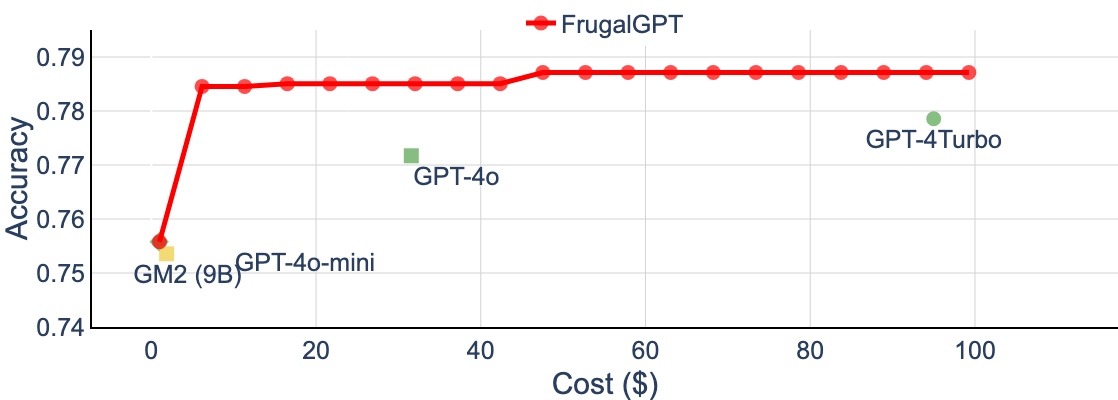

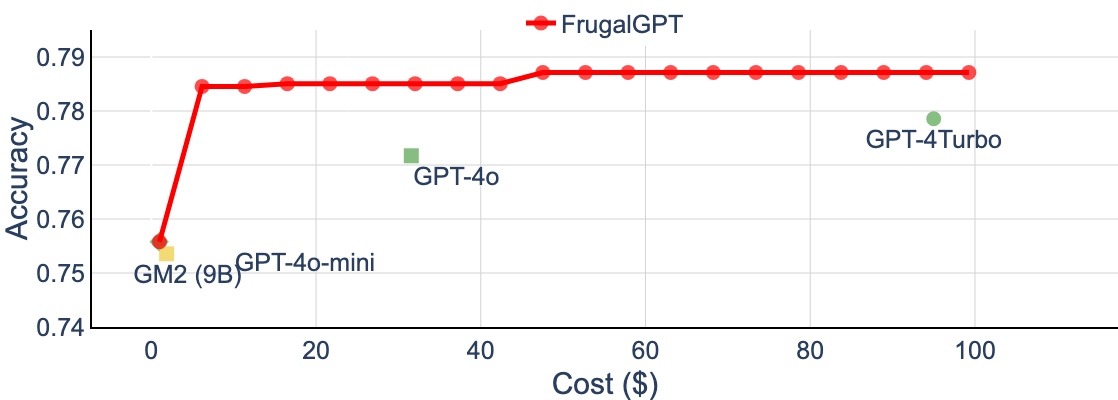

In [6]:
show_tradeoffs(SingleLLM = ['Meta-Llama-3-70B-Instruct-Turbo',
    "gpt-4o-mini","gpt-4o","gpt-4-turbo","gemma-2-9b-it","CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","J1","J1-G","J1-L","FA-Q"],
              savepath="../../figures/SCIQ_2024updatemodel.pdf",
               datapath="../../summary/sciq_e8_perf_seed_9_2024updatedmodel.csv",
            datapath_FT='../../summary/headlines_e8_perf_seed_9_2024updatedmodel.csv',
               legend=True,
              LLM_Name_MAP={
                  "Meta-Llama-3-70B-Instruct-Turbo":"              Llama 3 (70B)",
                  "gemma-2-9b-it":"      GM2 (9B)",
                  "gpt-4o":"             GPT-4o", 
                  "gpt-4o-mini":"                                          GPT-4o-mini",
                  "gpt-4-turbo":"GPT-4Turbo",
                  "GPT-FSQ":"FSQ","GPT-C":"GPT-C","CoHere":" CoHere","CoHere-M":"C-M","FA-Q":"FQ","FA-C":"FC","FT-C":"FT","CHATGPT":"ChatGPT","J1":"   J1"},
              yrange=[0.74,0.795],
                     width=500,
                   height=400,
              )